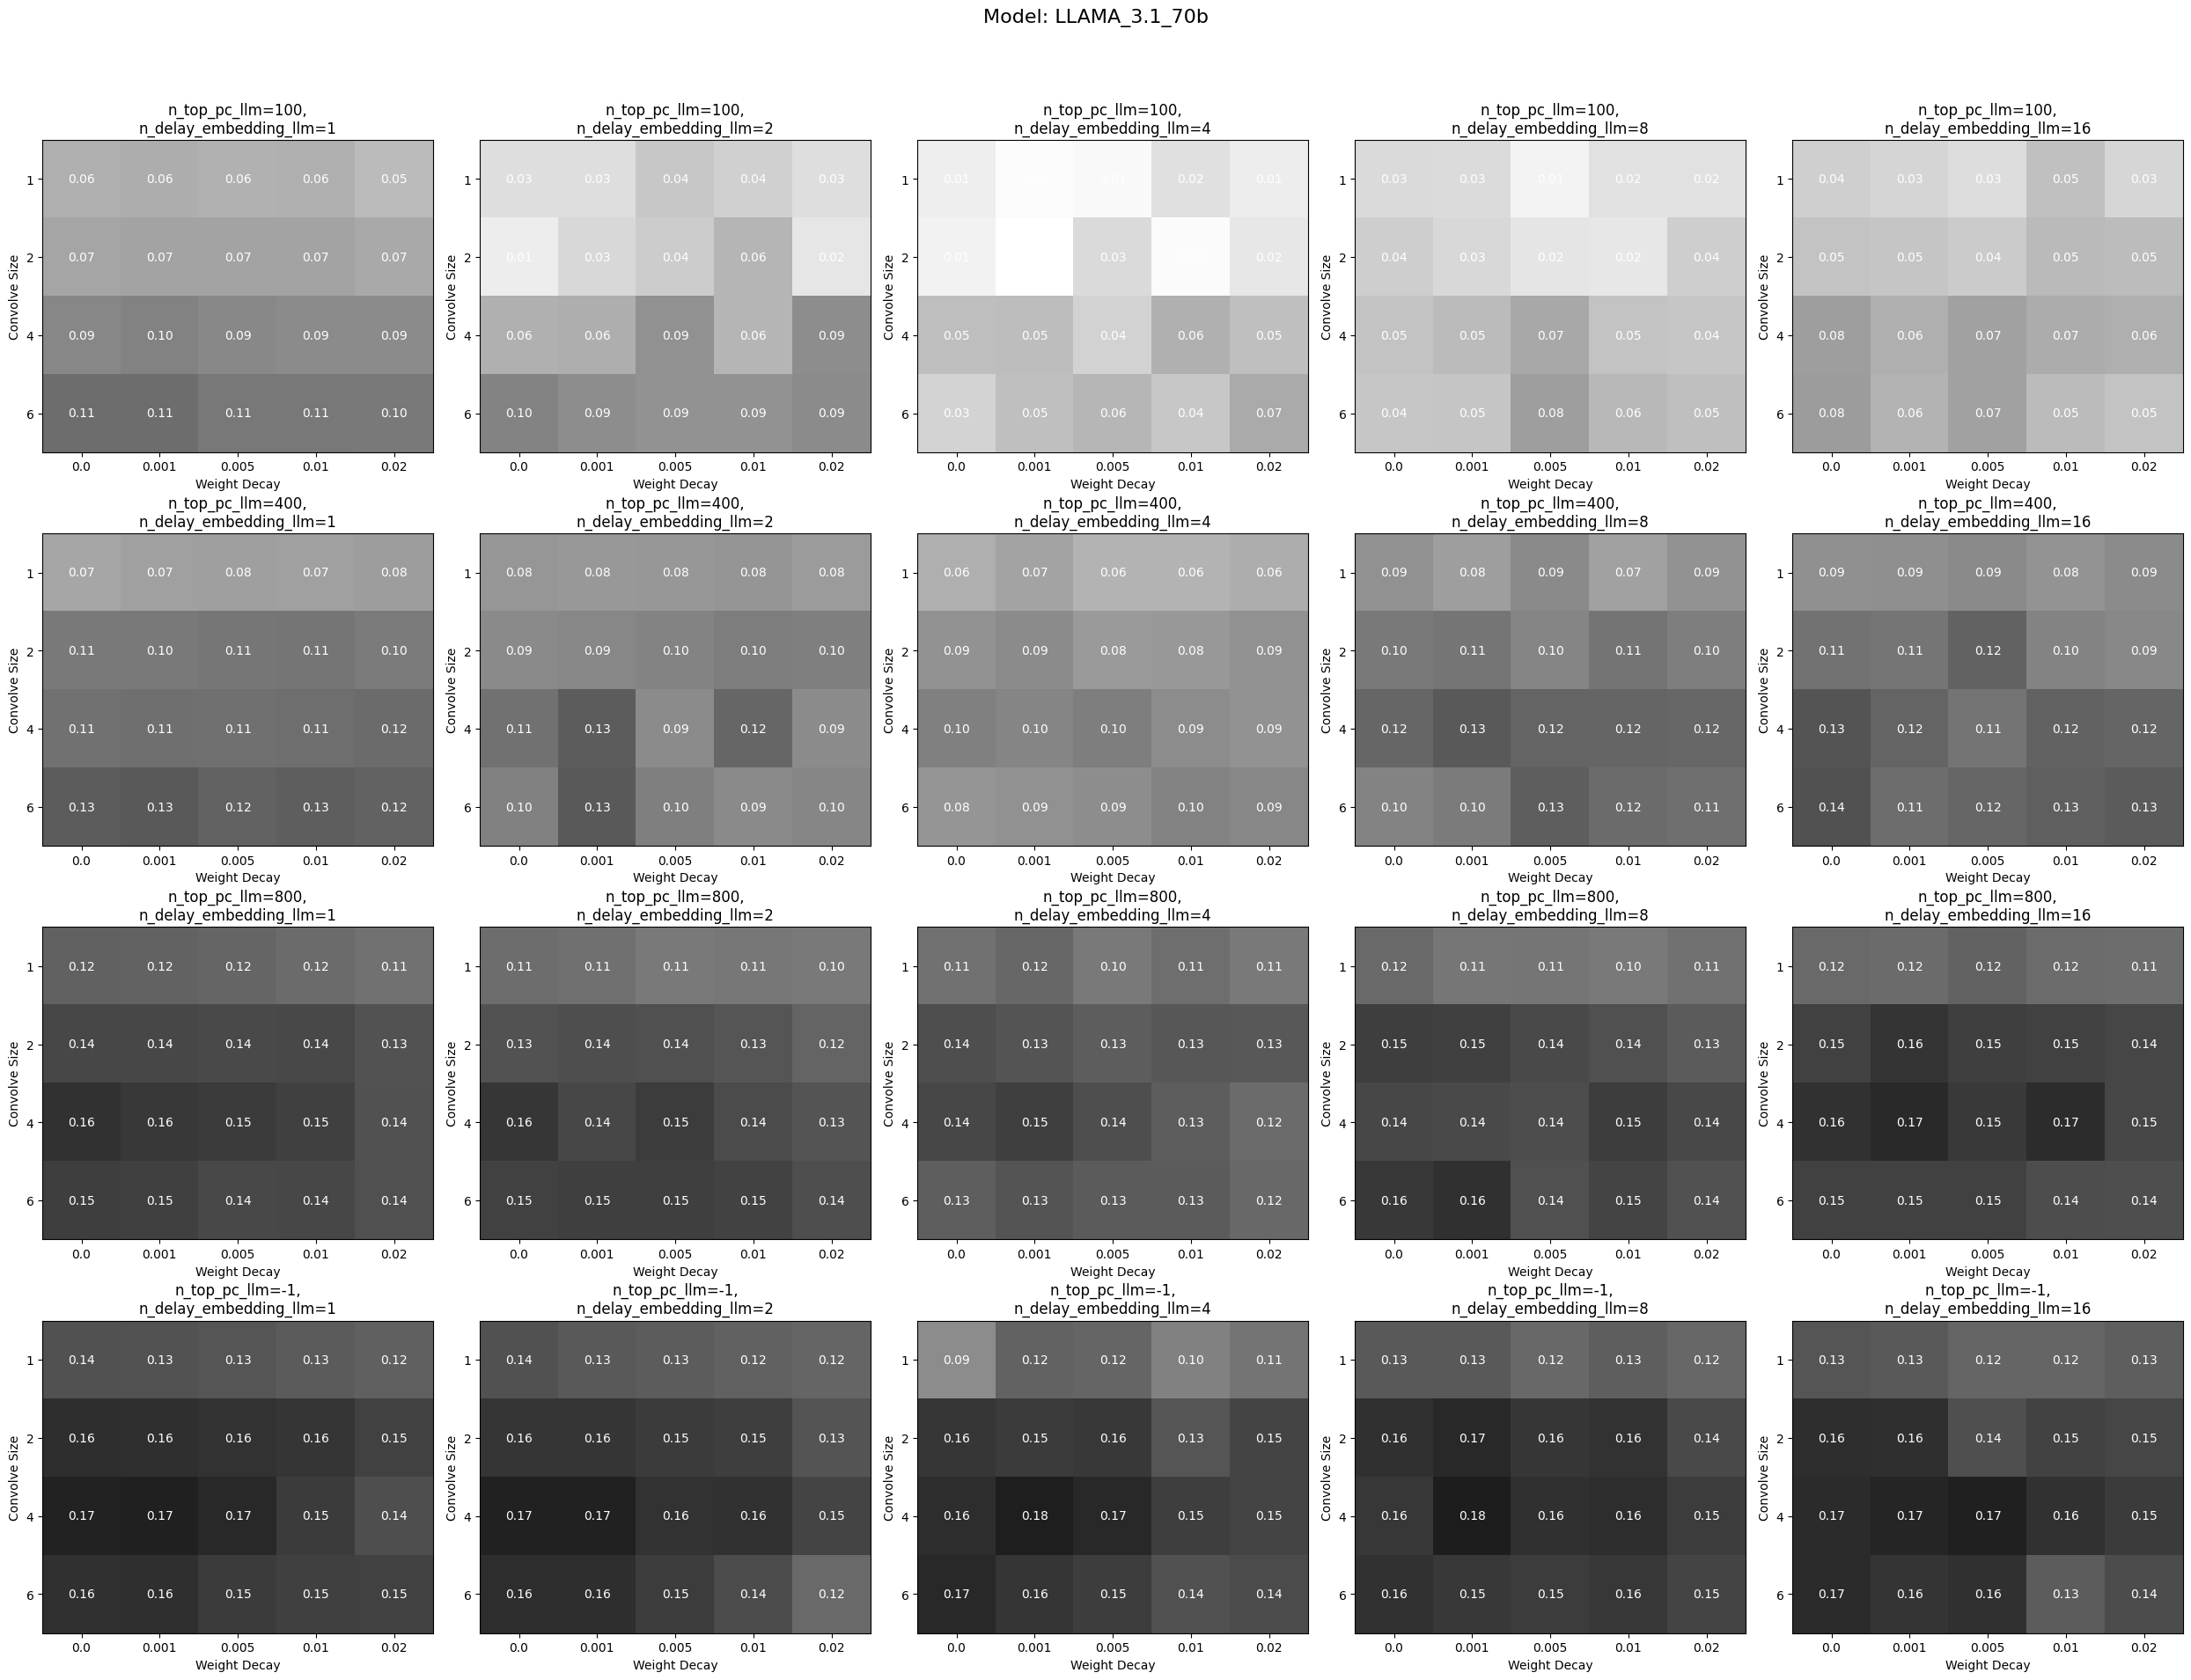

In [30]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Set this to 0 or 1 depending on which model you want to plot
llm_model_index = 1  # Change this to 1 for the other model

# Parameters
weight_decay_values = [0.0, 0.001, 0.005, 0.01, 0.02]
convolve_size_values = [1, 2, 4, 6]
n_top_pc_llm_values = [100, 400, 800, -1]
n_delay_embedding_llm_values = [1, 2, 4, 8, 16]
random_seeds = list(range(5))  # 0 to 4

# Function to read JSON files and extract r values
def extract_r_value(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data['r_value_test']

# Create a 4x5 grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(25, 20))
fig.suptitle(f"Model: {'GPT2_XL' if llm_model_index == 0 else 'LLAMA_3.1_70b'}", fontsize=16)

# Iterate over n_top_pc_llm and n_delay_embedding_llm values
for i, n_top_pc_llm in enumerate(n_top_pc_llm_values):
    for j, n_delay_embedding_llm in enumerate(n_delay_embedding_llm_values):
        # Create a 2D array to store mean r values
        r_values_mean = np.zeros((len(convolve_size_values), len(weight_decay_values)))
        
        # Iterate over convolve_size and weight_decay values
        for k, convolve_size in enumerate(convolve_size_values):
            for l, weight_decay in enumerate(weight_decay_values):
                r_values_runs = []
                
                # Iterate over random seeds
                for seed in random_seeds:
                    # Construct the filename
                    filename = f"figures/data_{'gpt2_xl' if llm_model_index == 0 else 'llama70b'}_nde{n_delay_embedding_llm}_npc{n_top_pc_llm}_cs{convolve_size}_wd{weight_decay:.3f}_r{seed}_data.json"
                    #filename = f"figures_old/data_{'gpt2_xl' if llm_model_index == 0 else 'llama70b'}_nde{n_delay_embedding_llm}_npc{n_top_pc_llm}_cs{convolve_size}_wd{weight_decay:.3f}_data.json"

                    # Extract r value if file exists
                    if os.path.exists(filename):
                        r_values_runs.append(extract_r_value(filename))
                
                # Calculate mean r value if we have any valid runs
                if r_values_runs:
                    r_values_mean[k, l] = np.mean(r_values_runs)
                else:
                    r_values_mean[k, l] = np.nan
        
        # Create heatmap with square boxes
        im = axes[i, j].imshow(r_values_mean, cmap='gray_r', aspect='equal', vmin=0.0, vmax=0.2)
        
        # Add text annotations
        for k in range(len(convolve_size_values)):
            for l in range(len(weight_decay_values)):
                text = axes[i, j].text(l, k, f'{r_values_mean[k, l]:.2f}',
                                       ha="center", va="center", color="w")
        
        # Set title and labels
        axes[i, j].set_title(f'n_top_pc_llm={n_top_pc_llm},\nn_delay_embedding_llm={n_delay_embedding_llm}')
        axes[i, j].set_xticks(range(len(weight_decay_values)))
        axes[i, j].set_yticks(range(len(convolve_size_values)))
        axes[i, j].set_xticklabels(weight_decay_values)
        axes[i, j].set_yticklabels(convolve_size_values)
        axes[i, j].set_xlabel('Weight Decay')
        axes[i, j].set_ylabel('Convolve Size')

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()